# Feature Engineering

Loads all next_day_wildfire_spread data and applies feature engineering steps to it.

In [5]:
from matplotlib import colors
import matplotlib.pyplot as plt
from config import ROOT_DIR
import torch
import tensorflow as tf
import pickle
import joblib
from config import ROOT_DIR
from pathlib import Path

from src.features.feature_engineering import add_fire_distance_to_tensor, add_flow_accumulation_to_tensor

### Data Loading

In [ ]:
X_torch = joblib.load(ROOT_DIR / Path("Data/interim/X_torch.pkl"))
y_torch = joblib.load(ROOT_DIR / Path("Data/interim/y_torch.pkl"))

### Compute Distance Matrix
Distance Matrix which shows the distance for each pixel to the nearest fire.

In [3]:
fire_mask_index = 11
X = add_fire_distance_to_tensor(X, fire_mask_index)

In [4]:
X.shape

torch.Size([20, 64, 64, 13])

Add flow accumulation to tensors

In [5]:
wind_direction_index = 5
wind_speed_index = 8
X = add_flow_accumulation_to_tensor(X, wind_direction_index, wind_speed_index, fire_mask_index)

In [6]:
X.shape

torch.Size([20, 64, 64, 14])

In [8]:
TITLES = [
  'Elevation',
  'Wind\ndirection',
  'Wind\nvelocity',
  'Min\ntemp',
  'Max\ntemp',
  'Humidity',
  'Precip',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy\nrelease\ncomponent',
  'Distance',
  'Previous\nfire\nmask',
  'd'
]

In [9]:
# Number of rows of data samples to plot
n_rows = 5
# Number of data variables
n_features = X.shape[3]
# Variables for controllong the color map for the fire masks
CMAP = colors.ListedColormap(['black', 'silver', 'orangered'])
BOUNDS = [-1, -0.1, 0.001, 1]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

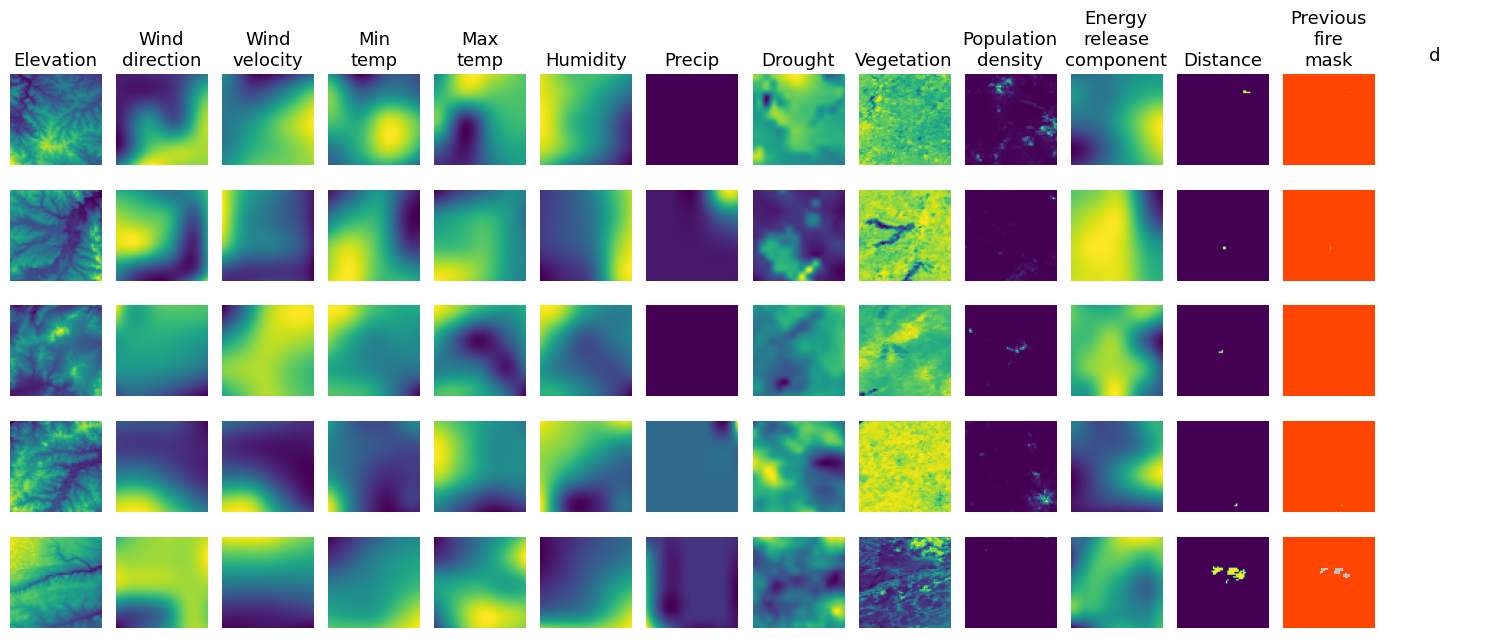

In [10]:
fig = plt.figure(figsize=(15,6.5))

for i in range(n_rows):
  for j in range(n_features + 1):
    plt.subplot(n_rows, n_features + 1, i * (n_features + 1) + j + 1)
    if i == 0:
      plt.title(TITLES[j], fontsize=13)
    if j < n_features - 1:
      plt.imshow(X[i, :, :, j], cmap='viridis')
    if j == n_features - 1:
      plt.imshow(X[i, :, :, -1], cmap=CMAP, norm=NORM)

    plt.axis('off')
plt.tight_layout()

In [26]:
X[1,:,:,12]

tensor([[51.2250, 50.6063, 50.0000,  ..., 48.8262, 49.4065, 50.0000],
        [50.4480, 49.8197, 49.2037,  ..., 48.0104, 48.6004, 49.2037],
        [49.6790, 49.0408, 48.4149,  ..., 47.2017, 47.8017, 48.4149],
        ...,
        [37.7359, 36.8917, 36.0555,  ..., 34.4093, 35.2278, 36.0555],
        [38.2753, 37.4433, 36.6197,  ..., 35.0000, 35.8050, 36.6197],
        [38.8330, 38.0132, 37.2022,  ..., 35.6090, 36.4006, 37.2022]])

In [ ]:
X, y = read_tfrecords(file_pattern="Data/next_day_wildfire_spread/next_day_wildfire_spread*", batch_size=20)


In [ ]:
fig = plt.figure(figsize=(15,6.5))

for i in range(n_rows):
  for j in range(n_features + 1):
    plt.subplot(n_rows, n_features + 1, i * (n_features + 1) + j + 1)
    if i == 0:
      plt.title(TITLES[j], fontsize=13)
    if j < n_features - 1:
      plt.imshow(X[i, :, :, j], cmap='viridis')
    if j == n_features - 1:
      plt.imshow(X[i, :, :, -1], cmap=CMAP, norm=NORM)

    plt.axis('off')
plt.tight_layout()